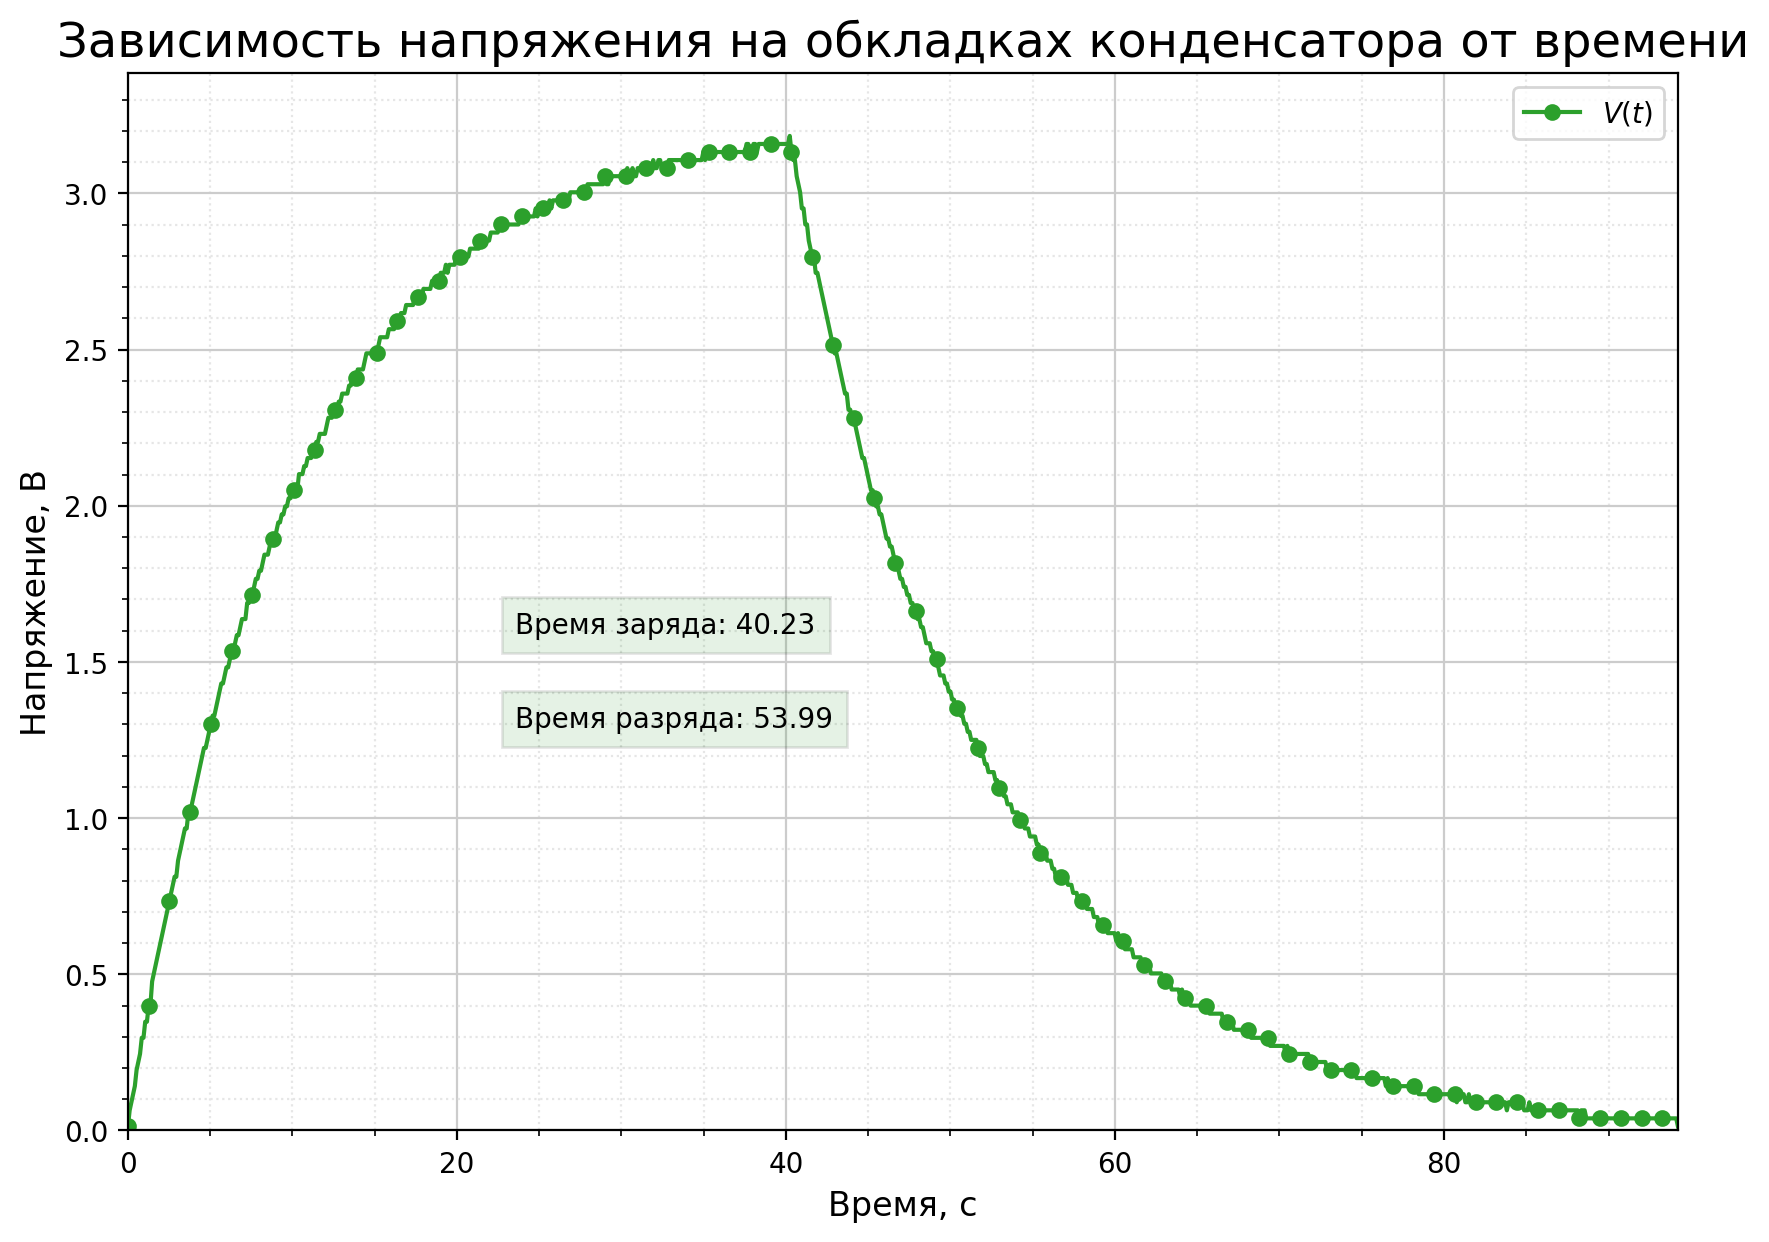

In [21]:
import numpy as np
import matplotlib.pyplot as plt


data = np.loadtxt('data.txt', dtype=np.float64)
count = len(data)
data = data/256*3.3
settings = np.loadtxt('settings.txt', dtype=np.float64)

sample_rate = settings[0]
q_step = settings[1]
time = count / sample_rate
t = np.linspace(0, time, count)

charge_time = t[data.argmax()]


# Указание размера и разрешения фигуры
fig, ax = plt.subplots(figsize=(10, 7), dpi=200)

# Рисуем линию по заданным параметрам
ax.plot(t, data, label='$V(t)$', color='tab:green', marker='o', markevery=12, linestyle='-', linewidth=1.5, markersize=5)

# Явное указание максимальных и минимальных значений шкалы по x и y 
ax.set_xlim(0, time)
ax.set_ylim(0, max(data) + 0.2)

# Указание названия осей
ax.set_xlabel('Время, с', size='large')
ax.set_ylabel('Напряжение, В', size='large')

# Указание названия графика
ax.set_title('Зависимость напряжения на обкладках конденсатора от времени', size='xx-large', wrap=True)

# Включаем сетку
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', color='0.9')
ax.grid(which='major', linestyle='-', color='0.8')

# Наносим на график текст и коробку для него
box = {'facecolor': 'green', 'alpha': 0.1, 'pad': 5}
x_text = time / 4
y_text = max(data) / 2
ax.text(x_text, y_text, f'Время заряда: {charge_time:.2f}', bbox=box)
ax.text(x_text, y_text - 0.3, f'Время разряда: {time - charge_time:.2f}', bbox=box)

# Финальный штрих
ax.legend() # Легенда
fig.savefig('8-1-fig.png') # Сохраняем в файл
plt.show() # Показываем график



